In [1]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
#from vaegan_fc import *
#from vaegan_conv import *
from cvaegan_conv import *
from cvaegan import CVAEGAN
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from tensorflow.python.framework import dtypes
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from dataset import DataSet
mnist = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
tf.reset_default_graph()

In [6]:
# Train
sess = tf.InteractiveSession()
build_encoder = Encoder(256)
build_decoder = Decoder(256)
build_discriminator = Discriminator(512)


model = CVAEGAN(sess, build_encoder, build_decoder, build_discriminator, dataset=mnist.train,
            batch_size = 100, z_dim = 50, x_dim = 784,
           learning_rate = 1e-3, num_epochs = 5, load=False, lr_decay=1., gamma=1.,
          checkpoint_name='cvaegan_conv'
)

In [17]:
# Load
sess = tf.InteractiveSession()
build_encoder = Encoder(512)
build_decoder = Decoder(512)
build_discriminator = Discriminator(1024)


model = CVAEGAN(sess, build_encoder, build_decoder, build_discriminator, dataset=mnist.train,
            batch_size = 100, z_dim = 50, x_dim = 784,
           learning_rate = 1e-5, num_epochs = 5, load=True, lr_decay=0.95, lr_decay_freq=1000,
               load_file = 'checkpoints/cvaegan_conv-good', checkpoint_name='test'
)

In [7]:
model.train()

Epoch 1 loss: 200.468686496 (time: 1073.41981983 s)
Epoch 2 loss: 152.560659152 (time: 1155.53667712 s)
Epoch 3 loss: 138.808556324 (time: 706.842072964 s)
Epoch 4 loss: 135.151765567 (time: 631.939148903 s)
Epoch 5 loss: 133.272552518 (time: 631.638855934 s)
70.3060863495 min


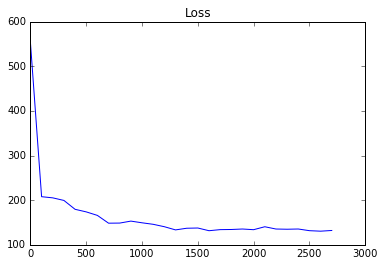

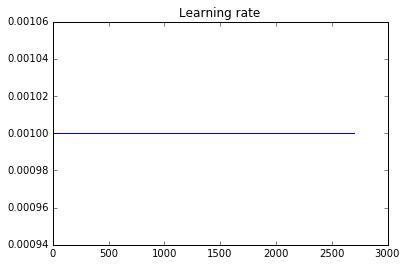

In [8]:
log = model.log
log = np.array(log).T
plt.plot(log[0,], log[1,])
plt.title('Loss')
plt.show()
plt.plot(log[0,], log[2,])
plt.title('Learning rate')
plt.show()

In [9]:
x = mnist.test.images[xrange(100)]
x_dis_real = sess.run(model.dis_real, feed_dict={model.x:x})
#print dis_real.T

0.861311


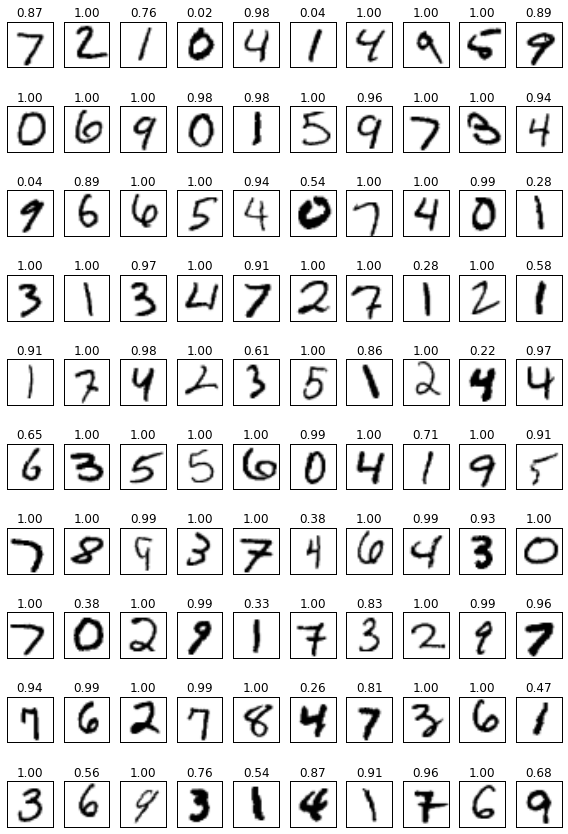

In [10]:
num_examples=10
print np.mean(x_dis_real)
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(x[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.title('{:.2f}'.format(x_dis_real[10*i+j][0]))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/SSL_generate_600')
plt.show()

In [21]:
num_examples = 10

info = np.repeat(np.identity(10), num_examples, axis=0)
generated_images = model.generate(num=100, info=info)

In [22]:
gen_dis_real = sess.run(model.dis_real, feed_dict={model.x:generated_images})
#print gen_dis_real.T

0.0161189


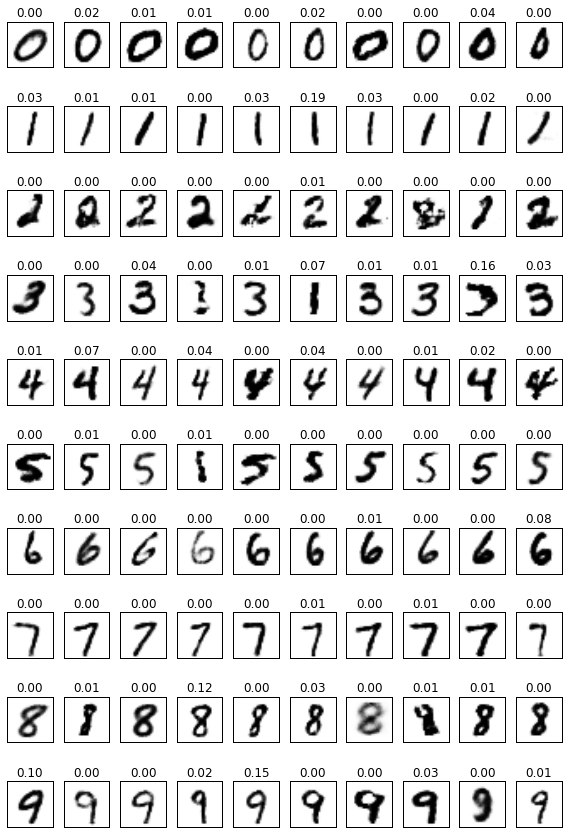

In [23]:
num_examples=10
print np.mean(gen_dis_real)
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.title('{:.2f}'.format(gen_dis_real[10*i+j][0]))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/CVAEGAN_conv_gen_1')
plt.show()

In [14]:
rando = np.random.randn(100, 28*28)
rando_dis_real = sess.run(model.dis_real, feed_dict={model.x:rando})
print rando_dis_real.T

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
